In [0]:
import torch
from torch import nn
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [0]:
data = load_iris()

In [0]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

In [0]:
X, y = df.drop(['target'], axis=1), df.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Normalize

In [0]:
m = X.mean()
s = X.std()
X_train = (X_train - m)/s
X_test  = (X_test  - m)/s

In [0]:
X_train = torch.FloatTensor(X_train.values)
X_test  = torch.FloatTensor(X_test.values)

In [0]:
y_train = torch.LongTensor(y_train.values)
y_test  = torch.LongTensor( y_test.values)

Network

In [0]:
y.nunique()

3

In [0]:
torch.manual_seed(42)
np.random.seed(42)

In [0]:
model = nn.Sequential(
    nn.Linear(X.shape[1], 30),
    nn.Sigmoid(),
    nn.Linear(30, 40),
    nn.Sigmoid(),
    nn.Linear(40, 3)
)

In [0]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-2)

In [0]:
def train(num_epoch):
  train_losses = []
  test_losses = []
  for i in range(num_epoch):
    model.train(True)
    #Loss
    y_pred = model(X_train)
    train_loss = loss_fn(y_pred, y_train)
    train_losses.append( float(train_loss) )
    #zero grad
    optimizer.zero_grad()
    #back prop
    train_loss.backward()
    #update weigths
    optimizer.step()

    model.train(False)
    y_pred = model(X_test)
    test_loss = loss_fn(y_pred, y_test)
    test_losses.append( float(test_loss) )

  return train_losses, test_losses 


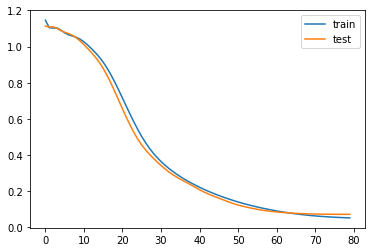

In [0]:
train_losses, test_losses = train(80)
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.plot(range(len(test_losses)), test_losses, label='test')
plt.legend()

Predictions

In [0]:
y_pred1 = np.argmax( model(X_test).detach().numpy(), axis=1 )
y_test1 = y_test.numpy()

In [0]:
((y_pred1 == y_test1).sum())/y_pred1.size

0.9736842105263158